# 필요한 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터셋 로드

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 수치형 변수를 범주형 변수로 만들기

In [26]:
df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]]

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False
...,...,...
763,10,True
764,2,False
765,5,False
766,1,False


In [54]:
#One-Hot-Encoding
#수치 데이터 -> 범주 -> 수치
df["Age_low"] = df["Age"] < 25
df["Age_middle"] = (df["Age"]>=25) & (df["Age"]<=60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


# 결측치 다루기

In [79]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

In [80]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [84]:
df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin_nan", "Insulin"]]

,Insulin_nan,Insulin
0,NaN,0
1,NaN,0
2,NaN,0
3,94.0,94
4,168.0,168
...,...,...
763,180.0,180
764,NaN,0
765,112.0,112
766,NaN,0


In [85]:
df["Insulin_nan"].isnull().sum()

374

In [87]:
df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [113]:
df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])

<ipython-input-113-bea675cdc2dc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000     39  130.287879  102.5
1        100.335821      0  206.846154  169.5

In [117]:
#결측치 채우기
df.loc[(df["Outcome"] == 1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 206
df.loc[(df["Outcome"] == 0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 130

<AxesSubplot:xlabel='Age_high', ylabel='count'>

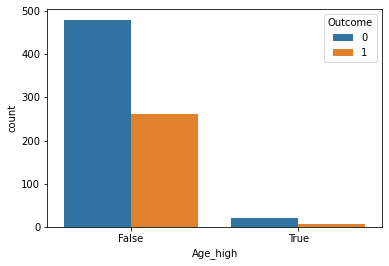

In [118]:
sns.countplot(data=df, x="Age_high", hue="Outcome")

# 학습, 예측 데이터셋 나누기

In [119]:
split_count = int(df.shape[0] * 0.8)
split_count

614

In [120]:
train = df[:split_count].copy()
train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,206.0
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,130.0
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,206.0
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,111,62,13,182,24.0,0.138,23,0,False,True,False,False,182.0
610,3,106,54,21,158,30.9,0.292,24,0,False,True,False,False,158.0
611,3,174,58,22,194,32.9,0.593,36,1,False,False,True,False,194.0
612,7,168,88,42,321,38.2,0.787,40,1,True,False,True,False,321.0


In [121]:
test = df[split_count:].copy()
test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan
614,11,138,74,26,144,36.1,0.557,50,1,True,False,True,False,144.0
615,3,106,72,0,0,25.8,0.207,27,0,False,False,True,False,130.0
616,6,117,96,0,0,28.7,0.157,30,0,False,False,True,False,130.0
617,2,68,62,13,15,20.1,0.257,23,0,False,True,False,False,15.0
618,9,112,82,24,0,28.2,1.282,50,1,True,False,True,False,206.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,True,False,False,True,180.0
764,2,122,70,27,0,36.8,0.340,27,0,False,False,True,False,130.0
765,5,121,72,23,112,26.2,0.245,30,0,False,False,True,False,112.0
766,1,126,60,0,0,30.1,0.349,47,1,False,False,True,False,206.0


# 학습, 예측에 사용할 컬럼

In [128]:
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan']

# 정답값이자 예측해야 될 값

In [129]:
label_name = "Outcome"
label_name

'Outcome'

# 학습, 예측 데이터셋 만들기

In [130]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan
0,148,72,35,33.6,0.627,50,False,206.0
1,85,66,29,26.6,0.351,31,False,130.0
2,183,64,0,23.3,0.672,32,True,206.0
3,89,66,23,28.1,0.167,21,False,94.0
4,137,40,35,43.1,2.288,33,False,168.0


In [131]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [132]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan
614,138,74,26,36.1,0.557,50,True,144.0
615,106,72,0,25.8,0.207,27,False,130.0
616,117,96,0,28.7,0.157,30,False,130.0
617,68,62,13,20.1,0.257,23,False,15.0
618,112,82,24,28.2,1.282,50,True,206.0


In [133]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 머신러닝 알고리즘 가져오기

In [134]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model

DecisionTreeClassifier(random_state=42)

# 학습(훈련)

In [135]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 예측

In [136]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

# 트리 알고리즘 분석하기

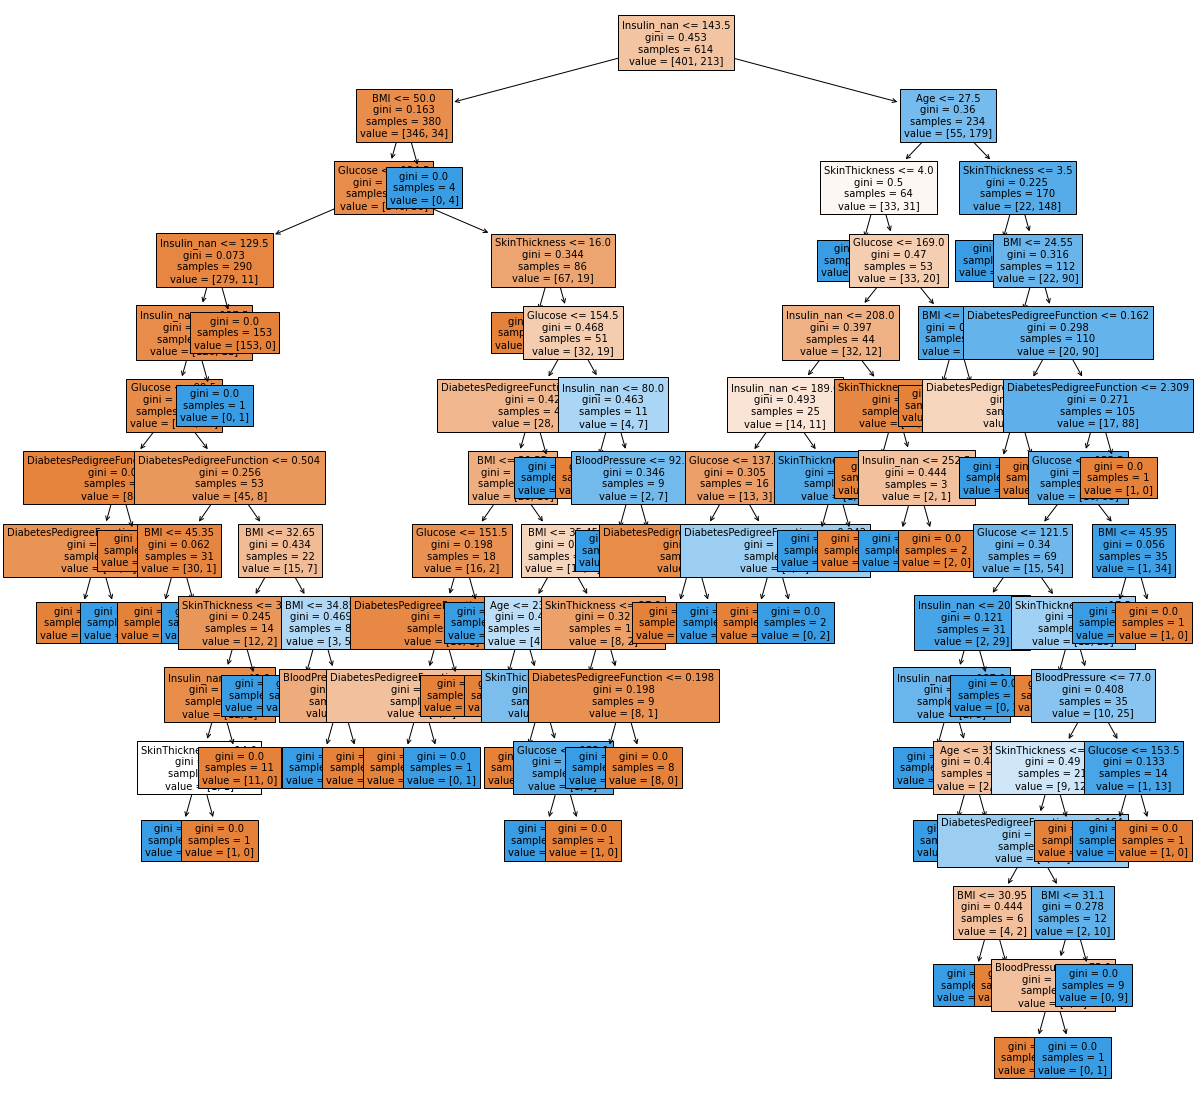

In [137]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree = plot_tree(model, 
                 feature_names=feature_names,
                filled = True, fontsize=10)

In [138]:
model.feature_importances_ #피처의 중요도 추출

array([0.08747114, 0.02906819, 0.10246683, 0.09867739, 0.08108996,
       0.06111749, 0.        , 0.540109  ])

<AxesSubplot:>

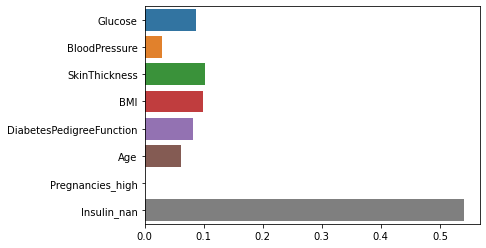

In [139]:
#중요도 시각화
sns.barplot(x=model.feature_importances_, y=feature_names)

# 정확도(Accuracy) 측정하기

In [140]:
#실제값 - 예측값을 빼주면 같은 값은 0으로 나오게 됨.
#그냥 y_test = y_predict 형식으로 해줘도 됨. False가 틀린것.
#44 -> 39 -> 49 -> 23
diff_count = abs(y_test - y_predict).sum()
diff_count

23

In [141]:
#예측의 정확도. 100점 만점에 몇 점을 맞았는지
(len(y_test) - diff_count) / len(y_test) * 100

85.06493506493507

In [142]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

85.06493506493507

In [143]:
model.score(X_test, y_test) * 100

85.06493506493507